<a href="https://colab.research.google.com/github/Sonia-Gharsalli/TP_NLP/blob/main/TP_embedding_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'objectif est de tester des modèles déjà pré-entrainer. Donc, on utilise KeyedVectors et on teste si le texte est bien représenté et est-ce qu'on a des oov.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
#from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
train = pd.read_csv("/content/drive/My Drive/TekUP_enseignement/NLP/Nouveau_TP/data_embedding/corpus.csv",encoding='utf-8')
#test = pd.read_csv("/content/drive/My Drive/TekUP_enseignement/NLP/Nouveau_TP/data_embedding/test.csv")
print("Train shape : ",train.shape)
#print("Test shape : ",test.shape)

Train shape :  (1306122, 3)


In [ ]:
from random import randint
def affichage(data):
  n_begin =randint(0,len(data)-50)
  print(n_begin)
  n_end = n_begin + 50
  print(n_end)
  for sentence in data.iloc[n_begin:n_end]:
    print(sentence)


In [ ]:
affichage(train["question_text"])

529720
529770
What are some examples of bad web designs?
How can I share web pictures to my Snapchat story?
What is the phenotypic ratio found in the F2 of mendal dihybrid cross?
How long does it take a photon to reach the Earth from the surface of the Sun?
Who is the best guitarist ever?
What are some helpful graphing calculator programs for AP Calculus?
Is retrofitting topic for thesis a design project?
What is the most advanced thing we have done with genetic mutation?
What will the Council do to cool the housing market in Vancouver, beside the foreign buyer ban and increase of supplies and interest rates which have already been discussed?
What would a CA of ICAI earn after 5 years of working experience in audit or industry?
Why does Quora consider this as astronomy?
What is the corporate culture like at Lynda.com?
Why does anxiety cause throat pain?
How do you think SEO is evolving? What are the new trends?
Should education be free?
What are the benefits of having wooden flooring i

Un premier pass pour voir la couverture du texte et du vocabulaire par les termes issues du modèle de représentation vectorielle.

In [ ]:
def build_vocab(sentences):
    """
    :sentences: list de termes
    :retour: vocabulaire des termes avec leurs count dans le corpus
    """
    vocab = {}
    for sentence in sentences:
      #print(sentence)
      for word in sentence:
        try:
          vocab[word] += 1
        except KeyError:
          vocab[word] = 1
    return vocab

In [ ]:
sentences = train["question_text"].apply(lambda x: x.split())
vocab = build_vocab(sentences)

In [ ]:
print(len(vocab))

508823


In [ ]:
print(vocab.keys())

dict_keys(['How', 'did', 'Quebec', 'nationalists', 'see', 'their', 'province', 'as', 'a', 'nation', 'in', 'the', '1960s?', 'Do', 'you', 'have', 'an', 'adopted', 'dog,', 'how', 'would', 'encourage', 'people', 'to', 'adopt', 'and', 'not', 'shop?', 'Why', 'does', 'velocity', 'affect', 'time?', 'Does', 'space', 'geometry?', 'Otto', 'von', 'Guericke', 'used', 'Magdeburg', 'hemispheres?', 'Can', 'I', 'convert', 'montra', 'helicon', 'D', 'mountain', 'bike', 'by', 'just', 'changing', 'tyres?', 'Is', 'Gaza', 'slowly', 'becoming', 'Auschwitz,', 'Dachau', 'or', 'Treblinka', 'for', 'Palestinians?', 'Quora', 'automatically', 'ban', 'conservative', 'opinions', 'when', 'reported,', 'but', 'do', 'same', 'liberal', 'views?', 'it', 'crazy', 'if', 'wash', 'wipe', 'my', 'groceries', 'off?', 'Germs', 'are', 'everywhere.', 'there', 'such', 'thing', 'dressing', 'moderately,', 'so,', 'is', 'that', 'different', 'than', 'modestly?', 'me', 'ever', 'been', 'this', 'phase', 'wherein', 'became', 'ignorant', 'once',

In [ ]:
import re
import string
def clean_punctuation(text):
  text =text.lower()
  text = re.sub('[^\w\s]',' ',text)
  text = re.sub('-',' ',text)
  return text.split()


In [ ]:
train["question_text_cleaned"] = train["question_text"].apply(clean_punctuation)

In [ ]:
affichage(train["question_text_cleaned"])

987704
987754
['which', 'article', 'allows', 'us', 'to', 'go', 'to', 'the', 'honourable', 'supreme', 'court', 'to', 'make', 'an', 'act', 'to', 'promote', 'prize', 'money', 'on', 'behalf', 'of', 'indian', 'citizens', 'by', 'the', 'central', 'government']
['what', 'is', 'a', 'profinite', 'set']
['what', 'is', 'purpose', 'of', 'a', 'skid', 'steer']
['what', 'should', 'i', 'do', 'when', 'i', 'will', 'meet', 'my', 'boyfriend', '1st', 'time', 'in', 'long', 'distance', 'relationhip']
['how', 'does', 'a', 'credit', 'card', 'with', 'limit', 'rs', '50000', 'work', 'what', 'are', 'the', 'terms', 'of', 'sbi', 'credit', 'cards']
['who', 'is', 'the', 'famous', 'fashion', 'designer', 'in', 'india']
['do', 'you', 'know', 'any', 'good', 'tattoo', 'artist', 'in', 'france', 'who', 'could', 'make', 'a', 'ripped', 'skin', 'effect']
['why', 'am', 'i', 'not', 'able', 'to', 'login', 'my', 'afcat', '2', '2017']
['why', 'is', 'oracle', 'online', 'training', 'gaining', 'popularity']
['how', 'do', 'amish', 'emplo

On teste les vecteurs de GoogleNews.

In [ ]:
from gensim.models import KeyedVectors

news_path = '/content/drive/My Drive/TekUP_enseignement/NLP/Nouveau_TP/data_embedding/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(news_path, binary=True)

In [ ]:
print(dir(embeddings_index))

['__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adapt_by_suffix', '_load_specials', '_log_evaluate_word_analogies', '_save_specials', '_smart_save', '_upconvert_old_d2vkv', '_upconvert_old_vocab', 'add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than', 'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies', 'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors', 'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key', 'init_sims', 'intersect_word2vec_format', 'key_to_index', 'lifecycle_even

In [ ]:
#'obama' in embeddings_index
print(embeddings_index.most_similar('obama'))

[('mccain', 0.7319012880325317), ('hillary', 0.7284600138664246), ('obamas', 0.7229632139205933), ('george_bush', 0.7205674648284912), ('barack_obama', 0.7045838832855225), ('palin', 0.7043113708496094), ('clinton', 0.6934447884559631), ('clintons', 0.6816835403442383), ('sarah_palin', 0.6815143823623657), ('john_mccain', 0.6800707578659058)]


Next I define a function that checks the intersection between our vocabulary and the embeddings. It will output a list of out of vocabulary (oov) words that we can use to improve our preprocessing

We also need the % of the covered vocabulary by the embeddings.
In the oov list we need the TF of each word.

In [ ]:
sentences = train["question_text_cleaned"]
vocab = build_vocab(sentences)

In [ ]:
print("nombre du vocabulaire après l'élimination de la ponctuation du corpus")
print(len(vocab))

nombre du vocabulaire après l'élimination de la ponctuation du corpus
195390


In [ ]:
print(vocab.keys())

dict_keys(['how', 'did', 'quebec', 'nationalists', 'see', 'their', 'province', 'as', 'a', 'nation', 'in', 'the', '1960s', 'do', 'you', 'have', 'an', 'adopted', 'dog', 'would', 'encourage', 'people', 'to', 'adopt', 'and', 'not', 'shop', 'why', 'does', 'velocity', 'affect', 'time', 'space', 'geometry', 'otto', 'von', 'guericke', 'used', 'magdeburg', 'hemispheres', 'can', 'i', 'convert', 'montra', 'helicon', 'd', 'mountain', 'bike', 'by', 'just', 'changing', 'tyres', 'is', 'gaza', 'slowly', 'becoming', 'auschwitz', 'dachau', 'or', 'treblinka', 'for', 'palestinians', 'quora', 'automatically', 'ban', 'conservative', 'opinions', 'when', 'reported', 'but', 'same', 'liberal', 'views', 'it', 'crazy', 'if', 'wash', 'wipe', 'my', 'groceries', 'off', 'germs', 'are', 'everywhere', 'there', 'such', 'thing', 'dressing', 'moderately', 'so', 'that', 'different', 'than', 'modestly', 'me', 'ever', 'been', 'this', 'phase', 'wherein', 'became', 'ignorant', 'once', 'loved', 'completely', 'disregarding', 'fe

In [ ]:
def retour_oov(vocab,embeddings):
  oov ={}
  a ={}
  nb_words_covered =0
  nb_words_oov =0
  for word in vocab:
    try:
      a[word] = embeddings[word]
      nb_words_covered += vocab[word]
    except:
      oov[word] = vocab[word]
      nb_words_oov += 1
  couvered_text = (nb_words_covered/(nb_words_covered + nb_words_oov ))*100
  covered_vocab = (len(a)/len(vocab))*100
  print(f'le % du texte couvert par le embeddings est {couvered_text:.2f}')
  print(f'le % du vocabulaire couvert par le embeddings est {covered_vocab:.2f}')

  return sorted(oov.items(),key=lambda x:x[1], reverse=True)

In [ ]:
oov =retour_oov(vocab,embeddings_index)

le % du texte couvert par le embeddings est 99.22
le % du vocabulaire couvert par le embeddings est 39.24


In [ ]:
print(oov[:100])

[('a', 411533), ('to', 408009), ('of', 333515), ('and', 257922), ('quora', 15948), ('2017', 8864), ('10', 7537), ('2018', 7419), ('12', 3873), ('100', 3165), ('20', 3071), ('15', 2701), ('12th', 2570), ('11', 2540), ('instagram', 2511), ('30', 2307), ('50', 2244), ('upsc', 2179), ('18', 2157), ('000', 2109), ('bitcoin', 1990), ('16', 1687), ('14', 1643), ('17', 1603), ('mbbs', 1561), ('whatsapp', 1511), ('13', 1500), ('25', 1407), ('40', 1350), ('2016', 1284), ('favourite', 1247), ('ece', 1160), ('60', 1128), ('10th', 1092), ('2019', 1072), ('aiims', 1038), ('24', 1006), ('centre', 991), ('colour', 988), ('iim', 967), ('200', 964), ('500', 963), ('90', 961), ('sbi', 948), ('cgl', 931), ('1000', 889), ('cryptocurrency', 872), ('quorans', 858), ('btech', 844), ('snapchat', 828), ('11th', 820), ('obc', 817), ('21', 811), ('80', 800), ('19', 799), ('22', 770), ('jio', 770), ('70', 761), ('manipal', 741), ('bba', 719), ('travelling', 717), ('icse', 658), ('counselling', 646), ('tcs', 632), 

In [ ]:
print(embeddings_index.index_to_key[:100])

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out', 'can', 'It', 'all', 'also', 'two', 'after', 'first', 'He', 'do', 'time', 'than', 'when', 'We', 'over', 'last', 'new', 'other', 'her', 'people', 'into', 'In', 'our', 'there', 'A', 'she', 'could', 'just', 'years', 'some', 'U.S.', 'three', 'million', 'them', 'what', 'But', 'so', 'no', 'like', 'if', 'only', 'percent', 'get', 'did', 'him', 'game', 'back', 'because', 'now', '#.#', 'before']


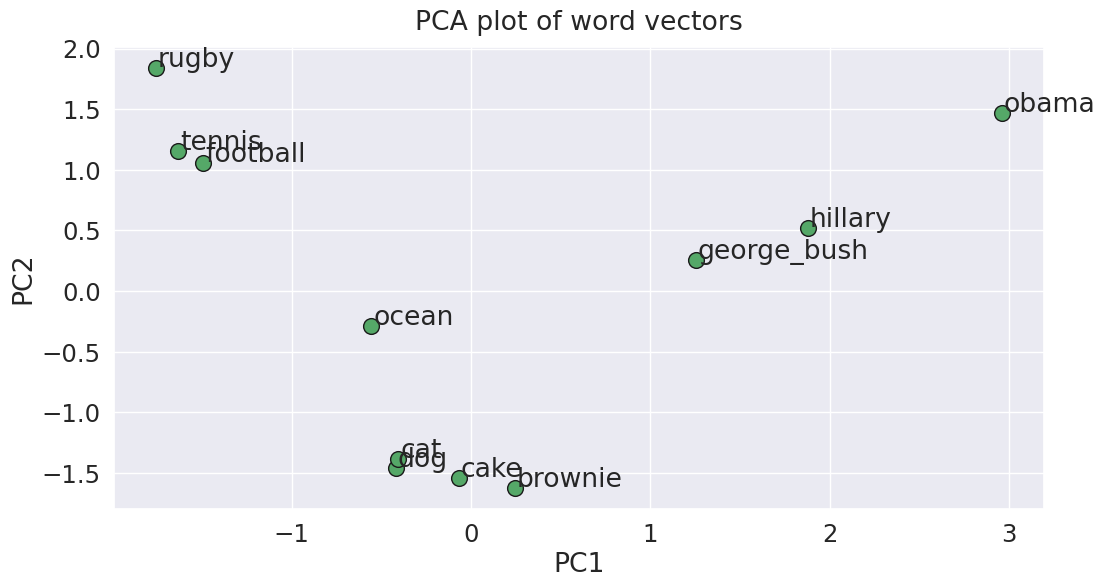

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('max_colwidth', 600)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import spacy
import random
import collections
import re

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import gensim
words = ["football","tennis","rugby",'hillary',"ocean",'obama',"brownie",'george_bush',"cake",'dog', 'cat'] #['swim', 'swimming', 'cat', 'dog', 'feline', 'road', 'car', 'bus']
word_vectors = np.array([embeddings_index[w] for w in words])

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

# Plot transformed vectors
plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0], X_pca[:,1], edgecolors='k', c='g', s=128)
for word, (x,y) in zip(words, X_pca):
    plt.text(x+0.01,y+0.01, word)
plt.title("PCA plot of word vectors", y=1.02)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [ ]:
for i in oov[:100]:print(i)

('a', 411533)
('to', 408009)
('of', 333515)
('and', 257922)
('quora', 15948)
('2017', 8864)
('10', 7537)
('2018', 7419)
('12', 3873)
('100', 3165)
('20', 3071)
('15', 2701)
('12th', 2570)
('11', 2540)
('instagram', 2511)
('30', 2307)
('50', 2244)
('upsc', 2179)
('18', 2157)
('000', 2109)
('bitcoin', 1990)
('16', 1687)
('14', 1643)
('17', 1603)
('mbbs', 1561)
('whatsapp', 1511)
('13', 1500)
('25', 1407)
('40', 1350)
('2016', 1284)
('favourite', 1247)
('ece', 1160)
('60', 1128)
('10th', 1092)
('2019', 1072)
('aiims', 1038)
('24', 1006)
('centre', 991)
('colour', 988)
('iim', 967)
('200', 964)
('500', 963)
('90', 961)
('sbi', 948)
('cgl', 931)
('1000', 889)
('cryptocurrency', 872)
('quorans', 858)
('btech', 844)
('snapchat', 828)
('11th', 820)
('obc', 817)
('21', 811)
('80', 800)
('19', 799)
('22', 770)
('jio', 770)
('70', 761)
('manipal', 741)
('bba', 719)
('travelling', 717)
('icse', 658)
('counselling', 646)
('tcs', 632)
('srm', 627)
('23', 605)
('wwii', 604)
('blockchain', 596)
('nare

In [ ]:
list_embedding = embeddings_index.index_to_key[:100]
print(list_embedding)

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out', 'can', 'It', 'all', 'also', 'two', 'after', 'first', 'He', 'do', 'time', 'than', 'when', 'We', 'over', 'last', 'new', 'other', 'her', 'people', 'into', 'In', 'our', 'there', 'A', 'she', 'could', 'just', 'years', 'some', 'U.S.', 'three', 'million', 'them', 'what', 'But', 'so', 'no', 'like', 'if', 'only', 'percent', 'get', 'did', 'him', 'game', 'back', 'because', 'now', '#.#', 'before']


In [ ]:
cv =CountVectorizer(analyzer=clean_punctuation)
data = cv.fit_transform(train["question_text"])

In [ ]:
for i in range(len(embeddings_index)):
  if embeddings_index.key_to_index[i].startwith("#"):
    print(embeddings_index.key_to_index[i])

KeyError: 0

In [ ]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [ ]:
sentences = train["question_text"].progress_apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 11053/11053 [00:00<00:00, 257149.27it/s]

{'How': 2171, 'did': 309, 'Quebec': 1, 'nationalists': 1, 'see': 80}


In [ ]:
import operator

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x


In [ ]:
import re

def clean_numbers(x):

    x = re.sub('[0-9]{5,}', '#####', x)
    x = re.sub('[0-9]{4}', '####', x)
    x = re.sub('[0-9]{3}', '###', x)
    x = re.sub('[0-9]{2}', '##', x)
    return x

In [ ]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()

In [ ]:
train["question_text"] = train["question_text"].progress_apply(lambda x: clean_numbers(x))
sentences = train["question_text"].progress_apply(lambda x: x.split())
vocab = build_vocab(sentences)

In [ ]:
def _get_mispell(mispell_dict):
    mispell_re = re.compile('(%s)' % '|'.join(mispell_dict.keys()))
    return mispell_dict, mispell_re


mispell_dict = {'colour':'color',
                'centre':'center',
                'didnt':'did not',
                'doesnt':'does not',
                'isnt':'is not',
                'shouldnt':'should not',
                'favourite':'favorite',
                'travelling':'traveling',
                'counselling':'counseling',
                'theatre':'theater',
                'cancelled':'canceled',
                'labour':'labor',
                'organisation':'organization',
                'wwii':'world war 2',
                'citicise':'criticize',
                'instagram': 'social medium',
                'whatsapp': 'social medium',
                'snapchat': 'social medium'

                }
mispellings, mispellings_re = _get_mispell(mispell_dict)

def replace_typical_misspell(text):
    def replace(match):
        return mispellings[match.group(0)]

    return mispellings_re.sub(replace, text)

In [ ]:
train["question_text"] = train["question_text"].progress_apply(lambda x: replace_typical_misspell(x))
sentences = train["question_text"].progress_apply(lambda x: x.split())
to_remove = ['a','to','of','and']
sentences = [[word for word in sentence if not word in to_remove] for sentence in tqdm(sentences)]
vocab = build_vocab(sentences)